
# Unidad 2 Grupo 6

## Echocardiogram Data Set

### Etapa 1: Entendimiento de los datos

Francsico Suarez

In [1]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"
data = pd.read_csv(url, header=None, error_bad_lines=False, warn_bad_lines=True, na_values="?")

# filter out any rows that have more than 13 attributes
data = data[data.apply(lambda x: len(x) == 13, axis=1)]


# La columna llamada alive_at_1 es el atributo a predecir
data.columns = ['survival', 'stil_alive', 'age_at_heart_attack', 'pericardiac_effusion', 'fractional_shortening', 'epss', 'lvdd', 'wall_motion_score',
              'wall_motion_index', 'mult', 'name', 'group', 'alive_at_1']

dataOrginal = data
data.head()

<ipython-input-1-3e1b457b297b>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(url, header=None, error_bad_lines=False, warn_bad_lines=True, na_values="?")
<ipython-input-1-3e1b457b297b>:10: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(url, header=None, error_bad_lines=False, warn_bad_lines=True, na_values="?")
Skipping line 50: expected 13 fields, saw 14



,survival,stil_alive,age_at_heart_attack,pericardiac_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,11.0,0,71.0,0,0.260,9.000,4.600,14.0,1.00,1.000,name,1.0,0.0
1,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.70,0.588,name,1.0,0.0
2,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.00,1.000,name,1.0,0.0
3,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.45,0.788,name,1.0,0.0
4,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.25,0.571,name,1.0,0.0


Attribute Information:

1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive
3. age-at-heart-attack -- age in years when heart attack occurred
4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
10. mult -- a derivate var which can be ignored
11. name -- the name of the patient (I have replaced them with "name")
12. group -- meaningless, ignore it
13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

In [2]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(131, 13)

In [3]:
#El dataset description indica que estas columnas se deben ingnorar
data = data.drop('group',axis=1)
data = data.drop('name',axis=1)
data = data.drop('mult',axis=1)
shape = data.shape
shape

(131, 10)

In [4]:
#Cual es el tipo de los atributos?
data.dtypes

survival                 float64
stil_alive                 int64
age_at_heart_attack      float64
pericardiac_effusion       int64
fractional_shortening    float64
epss                     float64
lvdd                     float64
wall_motion_score        float64
wall_motion_index        float64
alive_at_1               float64
dtype: object

In [5]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,survival,stil_alive,age_at_heart_attack,pericardiac_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,alive_at_1
count,130.000000,131.000000,126.000000,131.000000,124.000000,117.000000,121.000000,128.000000,130.00000,74.000000
mean,22.182923,0.328244,62.813722,0.183206,0.216734,12.164769,4.763157,14.438125,1.37800,0.324324
std,15.858267,0.471377,8.342110,0.388320,0.107513,7.370159,0.810013,5.018566,0.45185,0.471317
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.000000
25%,7.875000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.000000
50%,23.500000,0.000000,62.000000,0.000000,0.205000,11.000000,4.650000,14.000000,1.21600,0.000000
75%,33.000000,1.000000,67.750000,0.000000,0.270000,16.100000,5.300000,16.500000,1.50750,1.000000
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.780000,39.000000,3.00000,1.000000


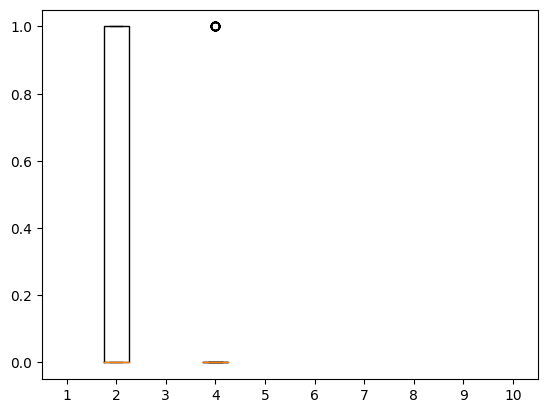

In [6]:
# Diagrama de cajas y bigotes para atributos numéricos
plt.boxplot((data['survival'],data['stil_alive'],data['age_at_heart_attack'],data['pericardiac_effusion'],data['fractional_shortening'], data['epss'], data['lvdd'], data['wall_motion_score'], data['wall_motion_index'], data['alive_at_1']))
plt.show()

In [7]:
#Medida de centralidad para atributos categóricos:
data.mode()

,survival,stil_alive,age_at_heart_attack,pericardiac_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,alive_at_1
0,0.50,0.0,62.0,0.0,0.15,0.0,4.36,14.0,1.0,0.0
1,0.75,NaN,NaN,NaN,NaN,NaN,4.48,NaN,NaN,NaN
2,1.00,NaN,NaN,NaN,NaN,NaN,5.20,NaN,NaN,NaN


<Axes: >

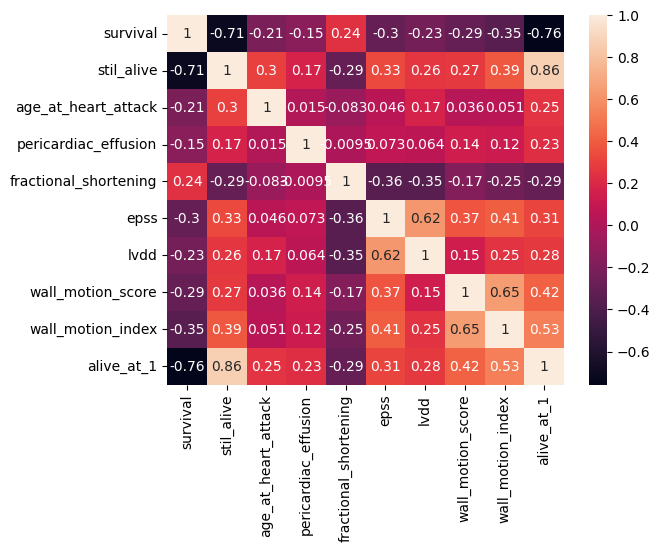

In [8]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)

sns.heatmap(data.corr(), annot=True)

In [9]:
#data = data.drop('',axis=1)
data.corr()

,survival,stil_alive,age_at_heart_attack,pericardiac_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,alive_at_1
survival,1.000000,-0.711073,-0.207691,-0.153606,0.241328,-0.295099,-0.230969,-0.292460,-0.354789,-0.758264
stil_alive,-0.711073,1.000000,0.295950,0.173229,-0.294011,0.330701,0.264787,0.272232,0.386709,0.863034
age_at_heart_attack,-0.207691,0.295950,1.000000,0.014594,-0.083279,0.045540,0.173159,0.035560,0.050617,0.254399
pericardiac_effusion,-0.153606,0.173229,0.014594,1.000000,-0.009492,0.073149,0.063501,0.143504,0.123202,0.225126
fractional_shortening,0.241328,-0.294011,-0.083279,-0.009492,1.000000,-0.357718,-0.349243,-0.171558,-0.248676,-0.293688
epss,-0.295099,0.330701,0.045540,0.073149,-0.357718,1.000000,0.624183,0.371534,0.405519,0.314328
lvdd,-0.230969,0.264787,0.173159,0.063501,-0.349243,0.624183,1.000000,0.146372,0.247416,0.278016
wall_motion_score,-0.292460,0.272232,0.035560,0.143504,-0.171558,0.371534,0.146372,1.000000,0.645427,0.418526
wall_motion_index,-0.354789,0.386709,0.050617,0.123202,-0.248676,0.405519,0.247416,0.645427,1.000000,0.530350
alive_at_1,-0.758264,0.863034,0.254399,0.225126,-0.293688,0.314328,0.278016,0.418526,0.530350,1.000000


In [10]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

5

In [11]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()
#data.loc[data['Bare_Nuclei'] == '?']

survival                  1
stil_alive                0
age_at_heart_attack       5
pericardiac_effusion      0
fractional_shortening     7
epss                     14
lvdd                     10
wall_motion_score         3
wall_motion_index         1
alive_at_1               57
dtype: int64

In [12]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['alive_at_1'].value_counts())

0.0    50
1.0    24
Name: alive_at_1, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.






In [13]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
#data.loc[data['survival'] == '?', 'survival'] = 	22.182923
data["survival"].fillna(22.182923, inplace = True)
data["age_at_heart_attack"].fillna(62.813722, inplace = True)
data["fractional_shortening"].fillna(0.216734, inplace = True)
data["epss"].fillna(12.164769, inplace = True)
data["lvdd"].fillna(4.763157, inplace = True)
data["wall_motion_score"].fillna(14.438125, inplace = True)
data["wall_motion_index"].fillna(1.37800, inplace = True)
rows_with_nan = data[data['alive_at_1'].isna()]

# set 'alive_at_1' to 1 if 'age_at_heart_attack' > 12, else set to 0
rows_with_nan.loc[rows_with_nan['survival'] > 12, 'alive_at_1'] = 1
rows_with_nan.loc[rows_with_nan['survival'] <= 12, 'alive_at_1'] = 0

# update the original dataset with the modified rows
data.update(rows_with_nan)
dataNoNanValues = data
data.head()

,survival,stil_alive,age_at_heart_attack,pericardiac_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,alive_at_1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.0


In [14]:
data.isnull().sum()


survival                 0
stil_alive               0
age_at_heart_attack      0
pericardiac_effusion     0
fractional_shortening    0
epss                     0
lvdd                     0
wall_motion_score        0
wall_motion_index        0
alive_at_1               0
dtype: int64

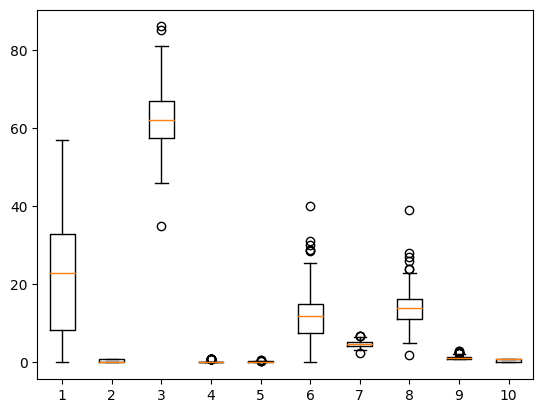

In [15]:
# Diagrama de cajas y bigotes para atributos numéricos
plt.boxplot((data['survival'],data['stil_alive'],data['age_at_heart_attack'],data['pericardiac_effusion'],data['fractional_shortening'], data['epss'], data['lvdd'], data['wall_motion_score'], data['wall_motion_index'], data['alive_at_1']))
#plt.boxplot((data['stil_alive']))
plt.show()

In [16]:
# Count the number of values outside the standard deviation for each column
outliers = {}
mean = data.mean()
std = data.std()
for column in data.columns:
    outliers[column] = ((data[column] > mean[column] + std[column]) | (data[column] < mean[column] - std[column])).sum()
outliers

{'survival': 52,
 'stil_alive': 43,
 'age_at_heart_attack': 37,
 'pericardiac_effusion': 24,
 'fractional_shortening': 35,
 'epss': 33,
 'lvdd': 35,
 'wall_motion_score': 31,
 'wall_motion_index': 22,
 'alive_at_1': 65}

In [17]:
#se reemplazan todos lso datos atipicos con la media de tu columna
for column in data.columns:
    print(column)
    if column != "survival" or column != "stil_alive" or column != "alive_at_1":
      outlier_mask = np.abs(data[column] - mean[column]) > std[column]
      data.loc[outlier_mask, column] = mean[column]

dataNoOutliers = data

outliers = {}
for column in data.columns:
    outliers[column] = ((data[column] > mean[column] + std[column]) | (data[column] < mean[column] - std[column])).sum()
outliers

survival
stil_alive
age_at_heart_attack
pericardiac_effusion
fractional_shortening
epss
lvdd
wall_motion_score
wall_motion_index
alive_at_1


{'survival': 0,
 'stil_alive': 0,
 'age_at_heart_attack': 0,
 'pericardiac_effusion': 0,
 'fractional_shortening': 0,
 'epss': 0,
 'lvdd': 0,
 'wall_motion_score': 0,
 'wall_motion_index': 0,
 'alive_at_1': 0}

<Axes: >

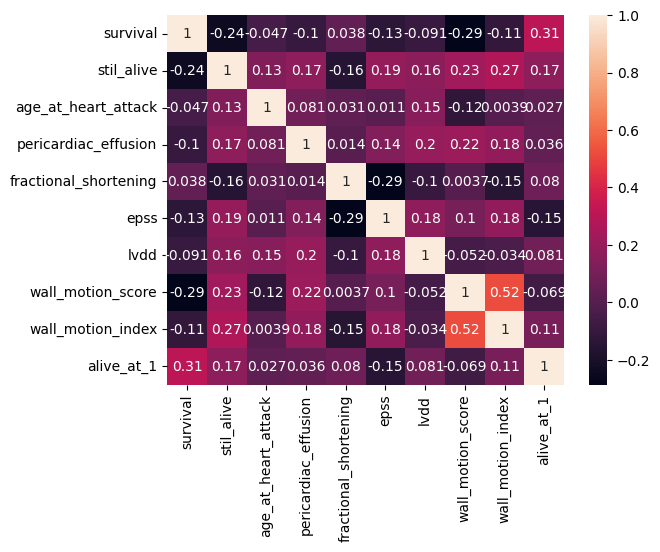

In [18]:
sns.heatmap(data.corr(), annot=True)
#No hay datos altamente correlacionados (>0.85 o <-0.85)

In [19]:
data['alive_at_1'] = data['alive_at_1'].astype('int64')
data['stil_alive'] = data['alive_at_1'].astype('int64')
data.dtypes

survival                 float64
stil_alive                 int64
age_at_heart_attack      float64
pericardiac_effusion     float64
fractional_shortening    float64
epss                     float64
lvdd                     float64
wall_motion_score        float64
wall_motion_index        float64
alive_at_1                 int64
dtype: object

In [20]:
from sklearn import preprocessing

# Se normalizan los tres atributos seleccionados
data['survival'] = preprocessing.scale(data['survival'])
#data['stil_alive'] = preprocessing.scale(data['stil_alive'])
data['age_at_heart_attack'] = preprocessing.scale(data['age_at_heart_attack'])
data['pericardiac_effusion'] = preprocessing.scale(data['pericardiac_effusion'])
data['fractional_shortening'] = preprocessing.scale(data['fractional_shortening'])
data['epss'] = preprocessing.scale(data['epss'])
data['lvdd'] = preprocessing.scale(data['lvdd'])
data['wall_motion_score'] = preprocessing.scale(data['wall_motion_score'])
data['wall_motion_index'] = preprocessing.scale(data['wall_motion_index'])
#data['alive_at_1'] = preprocessing.scale(data['alive_at_1'])
#se ignora la variable objetivo ya que la estaba modificando

dataNormaliced = data
data.head()

,survival,stil_alive,age_at_heart_attack,pericardiac_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,alive_at_1
0,-1.887003,0,0.129060,-0.473602,1.087356,-0.824170,-0.382678,0.063687,-1.101493,0
1,-0.650780,0,0.129060,-0.473602,0.132177,-1.830686,-1.773266,0.063687,2.163218,0
2,-1.114364,0,-2.152861,-0.473602,1.087356,0.237626,0.071090,0.063687,-1.101493,0
3,-0.158930,0,-0.692660,-0.473602,0.932818,0.203147,-0.374335,1.039268,0.997250,0
4,-0.650780,0,-1.568781,-0.473602,-1.120328,0.237626,0.071090,2.014849,0.661451,0


In [21]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data.groupby('alive_at_1')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

survival  stil_alive  age_at_heart_attack  \
alive_at_1                                                 
0          0  -0.158930           0            -1.860821   
           1  -0.158930           0            -2.152861   
           2  -0.650780           0             1.643662   
           3   0.276387           0             0.129060   
           4   1.358081           0             0.129060   
...                 ...         ...                  ...   
1          60  2.130720           1             0.475501   
           61  1.976192           1            -0.400620   
           62 -0.158930           1            -0.400620   
           63 -0.158930           1            -0.108580   
           64  1.976192           1             1.935702   

               pericardiac_effusion  fractional_shortening      epss  \
alive_at_1                                                             
0          0              -0.473602               0.132177  0.237626   
           1              -0.473602               1.528893 -1.998438   
           2              -0.473602               0.132177  0.237626   
           3              -0.473602              -1.561864  0.517851   
           4              -0.473602               0.132177 -0.723519   
...                             ...                    ...       ...   
1          60             -0.473602               0.132177  0.237626   
           61             -0.473602               1.308124 -0.824170   
           62             -0.473602              -0.237254 -0.689968   
           63             -0.473602               1.087356 -1.293877   
           64             -0.473602              -0.237254 -1.495180   

                   lvdd  wall_motion_score  wall_motion_index  alive_at_1  
alive_at_1                                                                 
0          0   0.071090           0.063687          -1.101493           0  
           1  -0.716419           0.277401           0.661451           0  
           2   0.071090           0.551478           2.023302           0  
           3  -0.688608           0.795373          -0.215357           0  
           4   0.071090          -1.399684          -0.066113           0  
...                 ...                ...                ...         ...  
1          60  0.071090          -0.911893           0.661451           1  
           61 -1.884513          -0.911893          -1.101493           1  
           62 -1.995760           0.878297           0.857334           1  
           63 -0.883290           0.063687          -1.101493           1  
           64  0.868851           0.307583          -0.122080           1  

[130 rows x 10 columns]

In [22]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['alive_at_1'].value_counts())

0    65
1    65
Name: alive_at_1, dtype: int64


#**Casos del dataset**

###**dataOrginal**
dataset original con 13 columnas, solo se eliminaron columnas con mas de 13 atributos ya que causan errores.

###**dataNoNanValues**
Dataset sin datos nulos '?', esto sdatos se cambiaron por la media de cada atributo, en el caso de la variable objetivo se volvio a calcular el valor de acuerdo a las pautas indicadas en Dataset Description.


###**dataNoOutliers**
Dataset sin datos atipicos, se reemplazan por la media de su atributo correspondiente, se ignora Survival, Still_Alive y Alive_at_1, ya que son variables objetivo o tienen el objetivo implicito, igualmente estas se ignoran en el modelo.

###**dataBal**
Dataset balanceado, la variable objetivo tiene dos posibles valores, asi que se igualan el numero de registros al valor con menos instancias.

## Etapa 3: Modelado
Se realiza el modelado completo para cada uno de los datasets descritos previamente

In [23]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dataSetAccuracies = {}

datasets = [dataNoNanValues, dataNoOutliers, dataNormaliced, dataBal]
datasetsNames = ["dataNoNanValues", "dataNoOutliers", "dataNormaliced", "dataBal"]
for datasetIter in range(4):
    dataset = datasets[datasetIter]
    dataset = dataset.drop(['survival', 'stil_alive'], axis=1)
    print(dataset.shape)
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop('alive_at_1', axis=1), dataset.alive_at_1, test_size=0.30)
    #print (X_train.shape, y_train.shape)
    #print (X_test.shape, y_test.shape)

    iterations = 1000

    solvers = ["lbfgs", "liblinear", "newton-cholesky"] #se prueban 3 solvers para ver cual se ajusta mejor a los datos del modelo
    solverAccuracy = []
    accuracies = []

    for i in solvers:
      for j in range(iterations):#se hacen varias iteraciones para obtener un accuracy que mejor describa el modelo
        logisticRegr = LogisticRegression(solver=i, max_iter=500, tol=0.01)
        logisticRegr.fit(X_train, y_train)
        predictions = logisticRegr.predict(X_test)
        accuracies.append(accuracy_score(y_test, predictions))
      solverAccuracy.append(np.mean(accuracies))
    #se obtiene el solver con mayor accuracy
    elSolver = solvers[np.argmax(solverAccuracy)]

    accuracies = []
    for i in range(iterations):
      logisticRegr = LogisticRegression(solver=elSolver, max_iter=500, tol=0.01)
      logisticRegr.fit(X_train, y_train)
      predictions = logisticRegr.predict(X_test)
      accuracies.append(accuracy_score(y_test, predictions))
      
    np.mean(accuracies)
    dataSetAccuracies[datasetsNames[datasetIter]] = np.mean(accuracies)
dataSetAccuracies

(131, 8)
(131, 8)
(131, 8)
(130, 8)


{'dataNoNanValues': 0.4249999999999999,
 'dataNoOutliers': 0.6500000000000002,
 'dataNormaliced': 0.6750000000000002,
 'dataBal': 0.6153846153846152}

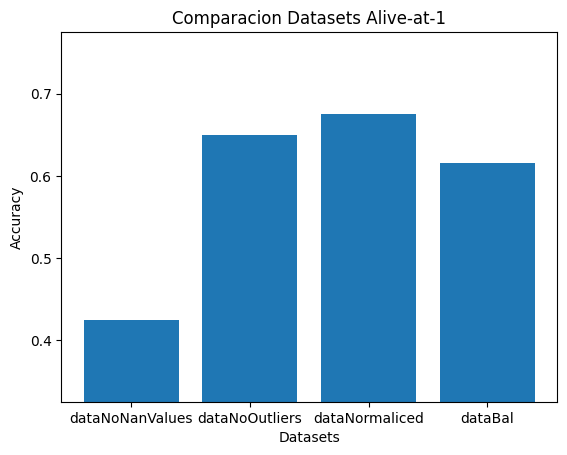

In [24]:
keys = list(dataSetAccuracies.keys())
values = list(dataSetAccuracies.values())
plt.bar(keys, values)
plt.ylim(min(dataSetAccuracies.values())-0.1, max(dataSetAccuracies.values())+0.1)
plt.title('Comparacion Datasets Alive-at-1')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')

# Show the graph
plt.show()

# Conclusiones
Se puede observar un crecimiento constante en el accuracy de los diferentes datasets a medida que los vamos procesando. Sin embargo, se nota una fuerte caída en el accuracy del dataset normalizado, lo que nos lleva a pensar que este proceso afecta negativamente al dataset. Sin embargo, podría ser un mal necesario para poder mejorar el accuracy aún más. O simplemente, puede ser que el dataset actual no sea un buen match para una normalización y otro dataset sí pueda verse favorecido por este proceso.

#Ahora vamos a intentar predecir el atributo Still_alive
###Hay que tener en cuenta que este atributo se puede derivar de Survival y Alive_at_1, asi que es importante quitar estos dos atributos del modelo

In [25]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = dataNormaliced.groupby('stil_alive')
dataBal2 = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal2

survival  stil_alive  age_at_heart_attack  \
stil_alive                                                 
0          0  -0.158930           0             2.227742   
           1  -1.114364           0             2.227742   
           2  -2.041530           0             1.059581   
           3  -0.158930           0             0.767541   
           4   1.358081           0             0.129060   
...                 ...         ...                  ...   
1          60  1.976192           1             1.935702   
           61 -0.158930           1            -0.400620   
           62 -0.959836           1             0.475501   
           63 -0.158930           1            -0.400620   
           64  1.358081           1             0.183461   

               pericardiac_effusion  fractional_shortening      epss  \
stil_alive                                                             
0          0               2.111477               0.866588 -0.589316   
           1               2.111477               1.308124  0.237626   
           2              -0.473602               1.749661  1.390164   
           3              -0.473602               0.132177 -0.891271   
           4              -0.473602               0.132177 -0.723519   
...                             ...                    ...       ...   
1          60             -0.473602              -0.237254 -1.495180   
           61             -0.473602               0.132180  0.237626   
           62             -0.473602              -1.341096 -1.629382   
           63             -0.473602              -0.237254 -0.689968   
           64             -0.473602              -0.237254  0.237626   

                   lvdd  wall_motion_score  wall_motion_index  alive_at_1  
stil_alive                                                                 
0          0   0.071090           0.277401          -0.635105           0  
           1  -0.688608           0.277401           0.661451           0  
           2   0.071090           0.063687          -1.101493           0  
           3   0.071090          -0.911893          -1.101493           0  
           4   0.071090          -1.399684          -0.066113           0  
...                 ...                ...                ...         ...  
1          60  0.868851           0.307583          -0.122080           1  
           61  0.071090           0.277401           0.661451           1  
           62 -1.578584           0.063687           0.157753           1  
           63 -1.995760           0.878297           0.857334           1  
           64  1.286027           0.277401          -1.101493           1  

[130 rows x 10 columns]

In [26]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal2['stil_alive'].value_counts())

0    65
1    65
Name: stil_alive, dtype: int64


In [27]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dataSetAccuracies = {}

datasets = [dataNoNanValues, dataNoOutliers, dataNormaliced, dataBal2]
datasetsNames = ["dataNoNanValues", "dataNoOutliers", "dataNormaliced", "dataBal2"]
for datasetIter in range(4):
    dataset = datasets[datasetIter]
    dataset = dataset.drop(['survival', 'alive_at_1'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop('stil_alive', axis=1), dataset.stil_alive, test_size=0.30)
    #print (X_train.shape, y_train.shape)
    #print (X_test.shape, y_test.shape)

    iterations = 1000

    solvers = ["lbfgs", "liblinear", "newton-cholesky"] #se prueban 3 solvers para ver cual se ajusta mejor a los datos del modelo
    solverAccuracy = []
    accuracies = []

    for i in solvers:
      for j in range(iterations):#se hacen varias iteraciones para obtener un accuracy que mejor describa el modelo
        logisticRegr = LogisticRegression(solver=i, max_iter=500, tol=0.01)
        logisticRegr.fit(X_train, y_train)
        predictions = logisticRegr.predict(X_test)
        accuracies.append(accuracy_score(y_test, predictions))
      solverAccuracy.append(np.mean(accuracies))
    #se obtiene el solver con mayor accuracy
    elSolver = solvers[np.argmax(solverAccuracy)]

    accuracies = []
    for i in range(iterations):
      logisticRegr = LogisticRegression(solver=elSolver, max_iter=500, tol=0.01)
      logisticRegr.fit(X_train, y_train)
      predictions = logisticRegr.predict(X_test)
      accuracies.append(accuracy_score(y_test, predictions))
      
    np.mean(accuracies)
    dataSetAccuracies[datasetsNames[datasetIter]] = np.mean(accuracies)
dataSetAccuracies

{'dataNoNanValues': 0.5499999999999999,
 'dataNoOutliers': 0.6750000000000002,
 'dataNormaliced': 0.5,
 'dataBal2': 0.5384615384615384}

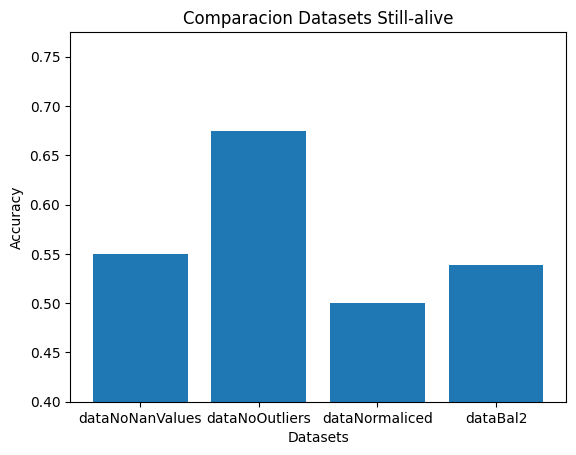

In [28]:
keys = list(dataSetAccuracies.keys())
values = list(dataSetAccuracies.values())
plt.bar(keys, values)
plt.ylim(min(dataSetAccuracies.values())-0.1, max(dataSetAccuracies.values())+0.1)
plt.title('Comparacion Datasets Still-alive')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')

# Show the graph
plt.show()

# Conclusiones
En este caso, se puede observar que después de eliminar los datos atípicos, en cada paso del procesamiento el accuracy es peor, lo que nos indica que el proceso de normalización afecta negativamente el dataset, y el balanceo no aumenta el accuracy suficiente para alcanzar el del dataset solo son datos nulos.

Por otro lado, cabe resaltar que esta no es la variable objetivo del dataset original. Esta variable simplemente indica que la persona está viva, ya sea porque superó el peligro del ataque o porque lleva poco tiempo desde el ataque y todavía está en riesgo. No todos los registros tienen el mismo tiempo transcurrido desde que sufrieron el ataque. Debido a esto, no considero que esta variable sea un buen indicativo. Esta variable solo se usa para, junto con survival, calcular si la persona está viva después de un año.